# <center>XOR Test Perceptron</center>

## Data Generation

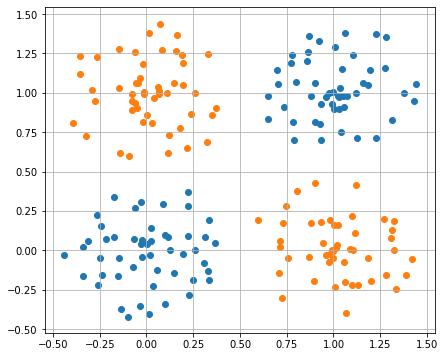

In [79]:
import numpy as np
import matplotlib.pyplot as plt

center1 = [[0,0],[1,1]]
center2 = [[0,1],[1,0]]

radius = 0.45
num_samples = 50
theta = np.linspace(0, 2*np.pi, num_samples)
a, b = 1 * np.cos(theta), 1 * np.sin(theta)

r = radius*np.random.random((num_samples))
x11, y11 = center1[0][0]+r * np.cos(theta), center1[0][1]+r * np.sin(theta)
r = radius*np.random.random((num_samples))
x12, y12 = center1[1][0]+r * np.cos(theta), center1[1][1]+r * np.sin(theta)
r = radius*np.random.random((num_samples))
x21, y21 = center2[0][0]+r * np.cos(theta), center2[0][1]+r * np.sin(theta)
r = radius*np.random.random((num_samples))                            
x22, y22 = center2[1][0]+r * np.cos(theta), center2[1][1]+r * np.sin(theta)
x1 = np.append(x11,x12)
y1 = np.append(y11,y12)
x2 = np.append(x21,x22)
y2 = np.append(y21,y22)

plt.figure(figsize=(7,6))

plt.scatter(x1, y1)
plt.scatter(x2,y2)
plt.grid()
plt.savefig("XOR.png")
plt.show()

In [80]:
x1 = np.matrix(x1).T
y1 = np.matrix(y1).T
x2 = np.matrix(x2).T
y2 = np.matrix(y2).T


data0 = np.hstack((x1,y1))
data1 = np.hstack((x2,y2))
data = np.append(data0,data1,axis=0)
data.shape

(200, 2)

In [81]:
labels = np.matrix(np.append(np.zeros((100)),np.ones((100)))).T
labels.shape

(200, 1)

In [82]:
data_withLabels = np.hstack((data,labels))
data_withLabels.shape

(200, 3)

In [83]:
np.savetxt("XOR_dataset.csv",data_withLabels,delimiter=',')

## Using XOR-dataset

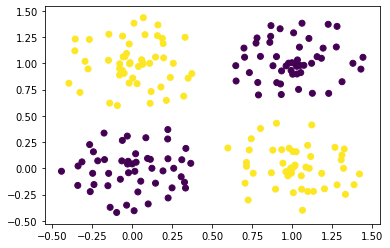

In [84]:
data = np.genfromtxt("XOR_dataset.csv",delimiter=',')

plt.scatter(data[:,0],data[:,1],c=data[:,2])
plt.show()

## Perceptron fails to give high accuracy on XOR dataset!

In [85]:
from sklearn.linear_model import Perceptron
X = data[:,:-1] ; y = data[:,-1]
clf = Perceptron()
clf.fit(X,y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [86]:
w = clf.coef_
b = clf.intercept_

In [87]:
w.shape

(1, 2)

In [88]:
xx = np.linspace(-0.5,1.5,100)
yy = -(1/w[0][1])*(w[0][0]*xx + b)

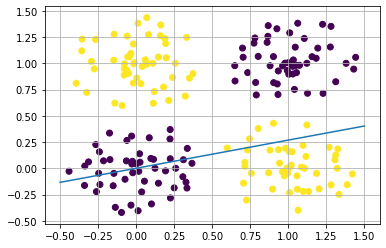

In [89]:
plt.scatter(data[:,0],data[:,1],c=data[:,2])
plt.plot(xx,yy)
plt.grid()
plt.show()

In [90]:
clf.score(X,y)

0.595